In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson, quad
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp



# Resolución de Integrales Dobles y Triples Usando Métodos Numéricos

## 1. Método Trapezoidal

El **Método Trapezoidal** es un método simple que aproxima la integral utilizando líneas rectas. Para integrales dobles y triples, este método se aplica de forma iterativa.

### Integral Doble

Dada una integral doble:

$$
I = \int_a^b \int_c^d f(x, y) \, dy \, dx,
$$

Aplicamos la fórmula del trapezoide en cada dimensión:

1. Dividimos el intervalo $ [a, b] $ en $ n $ subintervalos y el intervalo $ [c, d] $ en $ m $ subintervalos.
2. Evaluamos la función en los puntos correspondientes de la malla de discretización.

La aproximación es:

$$
I \approx \Delta x \Delta y \left[ \sum_{i=0}^{n} \sum_{j=0}^{m} w_i w_j f(x_i, y_j) \right],
$$

donde:

- $ \Delta x = \frac{b - a}{n - 1} $ es el paso en $ x $,
- $ \Delta y = \frac{d - c}{m - 1} $ es el paso en $ y $,
- $ x_i $ y $ y_j $ son los puntos de discretización,
- $ w_i, w_j $ son los pesos correspondientes, que se asignan de la siguiente manera:

  - En los vértices: peso $ 1 $,
  - En los bordes: peso $ 2 $,
  - En los puntos internos: peso $ 4 $.

### Integral Triple

Para una integral triple:

$$
I = \int_a^b \int_c^d \int_e^f f(x, y, z) \, dz \, dy \, dx,
$$

El procedimiento es similar al de la integral doble, pero aplicado en tres dimensiones:

$$
I \approx \Delta x \Delta y \Delta z \sum_{i=0}^{n} \sum_{j=0}^{m} \sum_{k=0}^{l} w_i w_j w_k f(x_i, y_j, z_k),
$$

donde:

- $ \Delta z = \frac{f - e}{l - 1} $,
- Los pesos $ w_i, w_j, w_k $ se asignan como en la integral doble (esquinas $ w = 1 $, bordes $ w = 2 $, puntos internos $ w = 4 $).

---

## 2. Método de Simpson

El **Método de Simpson** utiliza interpolaciones cuadráticas y es más preciso que el trapezoidal. Para integrales dobles y triples, se extiende de manera iterativa.

### Integral Doble con Simpson

Dada una integral doble:

$$
I = \int_a^b \int_c^d f(x, y) \, dy \, dx,
$$

1. Dividimos los intervalos $ [a, b] $ y $ [c, d] $ en $ n $ y $ m $ subintervalos, respectivamente (debe ser par).
2. Evaluamos la función en los puntos correspondientes de la malla.

La fórmula de Simpson es:

$$
I \approx \frac{\Delta x \Delta y}{9} \left[ f(x_0, y_0) + f(x_0, y_m) + f(x_n, y_0) + f(x_n, y_m) \right]
$$
$$
+ \frac{4}{9} \left[ \sum_{i=1}^{n-1} f(x_i, y_0) + \sum_{j=1}^{m-1} f(x_0, y_j) \right]
$$
$$
+ \frac{16}{9} \sum_{i=1}^{n-1} \sum_{j=1}^{m-1} f(x_i, y_j),
$$

donde:

- $ \Delta x = \frac{b - a}{n - 1} $ es el paso en $ x $,
- $ \Delta y = \frac{d - c}{m - 1} $ es el paso en $ y $,
- Los pesos $ 1 $, $ 4 $, y $ 16 $ se asignan a los puntos de la malla como se muestra en la fórmula.

### Integral Triple con Simpson

Para la integral triple:

$$
I = \int_a^b \int_c^d \int_e^f f(x, y, z) \, dz \, dy \, dx,
$$

La fórmula se expande en tres dimensiones:

$$
I ≈ \frac{\Delta x \Delta y \Delta z}{9} \left[ f(x_0, y_0, z_0) + f(x_0, y_0, z_l) + \cdots \right],
$$

y luego se suman las contribuciones de los puntos internos con los correspondientes pesos $ 1 $, $ 4 $, y $ 16 $.

---

## 3. Cuadratura Gaussiana

La **Cuadratura Gaussiana** utiliza puntos y pesos específicos que maximizan la precisión para polinomios de orden elevado. Para integrales dobles y triples, se realiza un cambio de variable para transformar los intervalos de integración a $ [-1, 1] $.

### Integral Doble con Cuadratura Gaussiana

Dada una integral doble:

$$
I = \int_a^b \int_c^d f(x, y) \, dy \, dx,
$$

1. Realizamos un cambio de variable para transformar los intervalos $ [a, b] $ y $ [c, d] $ a $ [-1, 1] $.
2. Evaluamos los puntos de cuadratura y sus pesos en los nuevos intervalos.

La aproximación es:

$$
I \approx \sum_{i=1}^n \sum_{j=1}^m w_i w_j f(x_i, y_j),
$$

donde:

- $ x_i $ y $ y_j $ son los puntos de cuadratura,
- $ w_i $ y $ w_j $ son los pesos correspondientes.

La fórmula del cambio de variable es:

$$
x = \frac{b - a}{2} t + \frac{a + b}{2}, \quad dx = \frac{b - a}{2} dt,
$$

y de manera similar para $ y $ en el intervalo $ [c, d] $.

### Integral Triple con Cuadratura Gaussiana

Para la integral triple:

$$
I = \int_a^b \int_c^d \int_e^f f(x, y, z) \, dz \, dy \, dx,
$$

Se realiza un cambio de variable en cada dimensión para transformar los intervalos $ [a, b] $, $ [c, d] $, y $ [e, f] $ a $ [-1, 1] $, y luego se evalúa la función en los puntos y pesos de cuadratura gaussiana en las tres dimensiones:

$$
I \approx \sum_{i=1}^n \sum_{j=1}^m \sum_{k=1}^l w_i w_j w_k f(x_i, y_j, z_k).
$$

---

### Resumen de Métodos:

| Método        | Integral Doble                     | Integral Triple                      |
|---------------|-------------------------------------|--------------------------------------|
| **Trapezoidal**   | Aproximación lineal, menos precisa. | Se aplica de forma iterativa en tres dimensiones. |
| **Simpson**       | Más preciso, usa interpolación cuadrática. | Se aplica de forma iterativa en tres dimensiones. |
| **Cuadratura Gaussiana** | Alta precisión, puntos y pesos específicos. | Se realiza un cambio de variable y se evalúa en los puntos de cuadratura. |

---



# Ejemplo usando el método trapezoidal compuesto

Resolver

$$\int_{1.4}^{2.0} \int_{1.0}^{1.5} \ln (x+2y)\, dy\, dx$$

In [ ]:
# Definir la función
f = lambda  x,y: np.log(x + 2*y)

# Límites de integración
a, b = 1.4, 2.0  # En x
c, d = 1.0, 1.5  # En y

# Discretización de los puntos
nx, ny = 10, 10  # Número de puntos en x y y
x = np.linspace(a, b, nx)
y = np.linspace(c, d, ny)

# Evaluar f(x, y) en una cuadrícula
X, Y = np.meshgrid(x, y, indexing='ij')  # Generar una malla

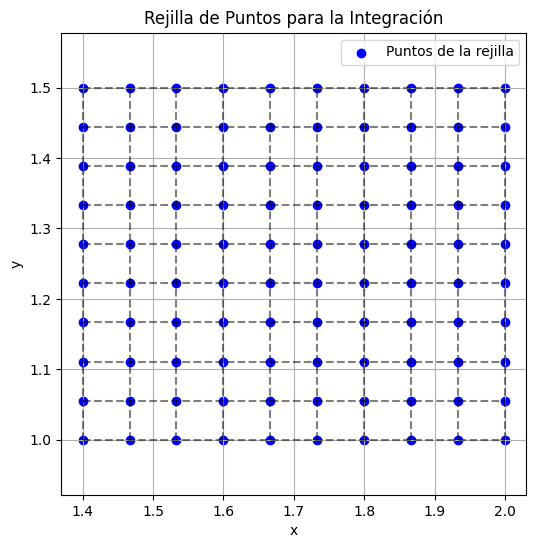

In [ ]:
#@title Graficar la rejilla

plt.figure(figsize=(6, 6))

plt.scatter(X, Y, color='blue', label='Puntos de la rejilla')

plt.plot(X, Y, 'k--', alpha=0.5)  # Líneas en la dirección de x

plt.plot(X.T, Y.T, 'k--', alpha=0.5)  # Líneas en la dirección de y



# Etiquetas y título

plt.title("Rejilla de Puntos para la Integración")

plt.xlabel("x")

plt.ylabel("y")

plt.legend()

plt.grid(True)

plt.axis('equal')

plt.show()

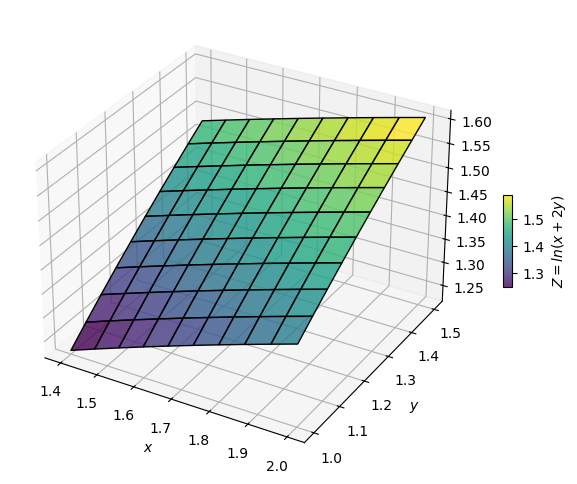

In [ ]:
#@title Evaluar f(X,Y) en la rejilla
Z = f(X, Y)

# Crear la figura
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Etiquetas y título

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


# Agregar barra de color
fig.colorbar(surf, shrink=0.2, aspect=10, label='$Z = ln(x + 2y)$')

plt.show()


In [ ]:
Z = f(X, Y)  # Evaluar la función en cada punto de la malla

# Integración en y (dimensión interna) para cada x
integral_y = trapezoid(Z, y, axis=1)

# Integración en x (dimensión externa)
resultado = trapezoid(integral_y, x)

print("Resultado de la integral doble:", resultado)

Resultado de la integral doble: 0.42953026105539455


# Ejemplo usando cuadratura Gaussiana adaptativa `quad`



In [ ]:
# Definir la función f(x, y)
f = lambda x, y: np.log(x + 2 * y)

# Límites de integración
a, b = 1.4, 2.0  # En x
c, d = 1.0, 1.5  # En y

# Integrar primero sobre y para cada x
def integrand_y(x):
    return quad(lambda y: f(x, y), c, d)[0]

# Luego integrar sobre x
result, error = quad(integrand_y, a, b)

# Imprimir el resultado
print("Resultado de la integral doble:", result)


Resultado de la integral doble: 0.4295545275482764


# Integrales Impropias


Una integral impropia es una integral definida en un intervalo infinito o en un intervalo donde la función presenta una discontinuidad.

## Tipos
* Integral impropia de primera especie: Intervalo de integración infinito
* Integral impropia de segunda especie: Función con discontinuidad en el intervalo

## Ejemplo
La integral
$$I = \int_{a}^{b} \frac{dx}{(x-a)^p}$$
es una integral impropia de primera especie.



In [ ]:
from sympy import Integral, oo
from sympy.abc import x
Integral(1/x, (x, 0, 1)).principal_value()

ValueError: The principal value is not defined in the given interval due to singularity at 0.

Los cambios de variable que mencionas son muy útiles para transformar **integrales impropias** o con singularidades en el dominio en **integrales definidas**, lo cual es esencial para métodos numéricos como la cuadratura gaussiana, ya que estos métodos requieren intervalos finitos y funciones bien definidas.

---

## 1. Cambio de variable para $[a, \infty)$

Si la integral tiene límites $[a, \infty)$, utiliza:
$$
x = \frac{1}{t}, \quad dx = -\frac{1}{t^2} dt.
$$

La integral original:
$$
I = \int_a^\infty f(x) \, dx
$$
se transforma en:
$$
I = \int_0^{1/a} f\left(\frac{1}{t}\right) \frac{1}{t^2} \, dt.
$$


---

## 2. Cambio de variable para $(-\infty, \infty) $


Si la integral tiene límites en $(-\infty, \infty) $, utiliza:
$$
x = \tan(\theta), \quad dx = \sec^2(\theta) d\theta.
$$

La integral original:
$$
I = \int_{-\infty}^\infty f(x) \, dx
$$
se transforma en:
$$
I = \int_{-\pi/2}^{\pi/2} f(\tan(\theta)) \sec^2(\theta) \, d\theta.
$$



---

## 3. Cambio de variable para $[a, \infty) $ o $ (-\infty, b] $ con una singularidad

Si la función $ f(x) $ tiene una singularidad en $x = c $, puedes usar el cambio:
$$
x = c + \frac{1}{t}, \quad dx = -\frac{1}{t^2} dt.
$$


La integral original:
$$
I = \int_a^\infty \frac{f(x)}{(x - c)} \, dx
$$
se transforma en:
$$
I = \int_0^{1/(a-c)} f\left(c + \frac{1}{t}\right) \frac{1}{t^2} \, dt.
$$



---

## 4. Cambio de variable para integrales con singularidades en $[a, b] $

Si $f(x)$ tiene una singularidad dentro del intervalo $ [a, b] $, por ejemplo en $x = c$, se puede usar:
$$
x = c + (b - a) t, \quad dx = (b - a) dt.
$$

La integral original:
$$
I = \int_a^b \frac{f(x)}{(x - c)^p} \, dx
$$
se transforma en:
$$
I = \int_0^1 \frac{f(c + (b - a)t)}{[(b - a)t]^p} (b - a) \, dt.
$$





---

### Ejemplo Práctico

Resolvamos:
$$
I = \int_1^\infty \frac{e^{-x}}{x^2} \, dx
$$
usando el cambio $x = \frac{1}{t}$, $dx = -\frac{1}{t^2} dt $.

**Transformación:**
$$
I = \int_1^\infty \frac{e^{-x}}{x^2} \, dx
= \int_0^1 e^{-1/t} t \, dt.
$$


In [ ]:
f = lambda t: np.exp(-1/t) * t
resultado, error = quad(f, 0, 1)
print(f"Resultado de la integral: {resultado}, Error estimado: {error}")

Resultado de la integral: 0.10969196719785052, Error estimado: 5.412889614957981e-09
